## The concept behind K-means clustering in image compression involves grouping similar pixels together based on their color and spatial proximity. By identifying clusters of pixels that share similar characteristics, we can effectively represent those regions with fewer data points, resulting in significant file size reduction. 🔍🎛️

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Loading the Image

### Image source https://www.pexels.com/photo/contemporary-room-interior-with-furniture-and-carpet-on-floor-5417293/

In [18]:
image=cv2.imread('/content/pexels-andrea-davis-5417293.jpg')

In [19]:
def show_image(image):
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image_rgb)
  plt.axis('off')
  plt.show()

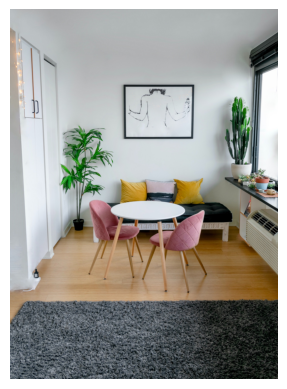

In [20]:
show_image(image)

### Dimensionality of image

In [10]:
row_pixels=image.shape[0]
col_pixels=image.shape[1]

## comp_image = kmeans.cluster_centers_[kmeans.labels_]

In this line, kmeans refers to an instance of the K-means clustering algorithm that has been fitted on the image data. kmeans.cluster_centers_ returns the coordinates of the cluster centers obtained from the clustering process. These cluster centers represent the average values of the pixels within each cluster.

kmeans.labels_ contains the labels assigned to each pixel in the image after clustering. Each pixel is assigned to the cluster with the nearest cluster center.

By indexing kmeans.cluster_centers_ with kmeans.labels_, we effectively assign the cluster center values to each pixel in the image based on their assigned labels. This creates a new image, comp_image, where each pixel is replaced with its corresponding cluster center value.

##comp_image = np.clip(comp_image.astype('uint8'), 0, 255)

Here, np.clip() is a NumPy function that ensures that the values in compressed image fall within a specified range. In this case, the range is from 0 to 255, which represents the valid range for pixel values in an 8-bit image.

compressed_image.astype('uint8') converts the data type of compressed image to unsigned 8-bit integers (uint8). This is necessary because the cluster center values might be represented as floating-point numbers after the clustering process.

Finally, np.clip() clips the values of compressed image to ensure they do not exceed the specified range (0 to 255). Any values below 0 will be set to 0, and any values above 255 will be set to 255.

In [26]:
image = image.reshape(row_pixels*col_pixels, 3)
n_k=128
kmeans = KMeans(n_clusters=n_k)
kmeans.fit(image)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=128)

### Compressing the image

In [33]:
comp_image = kmeans.cluster_centers_[kmeans.labels_]
comp_image = np.clip(comp_image.astype('uint8'), 0, 255)

### Reshaping the image

In [34]:
comp_image = comp_image.reshape(row_pixels, col_pixels, 3)

In [35]:
cv2.imwrite('comp_image.jpg',comp_image)

True

### Showing the compressed image

In [36]:
load_compress_image=cv2.imread('/content/comp_image.jpg')

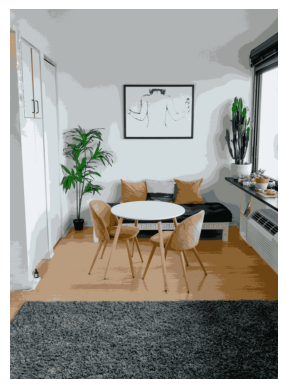

In [37]:
show_image(load_compress_image)